In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
from tqdm import tqdm
import pandas as pd
from scipy import sparse

In [2]:
df=pd.read_csv('german_credit_data.csv')

In [3]:
df.shape 

(1000, 11)

#### Le jeu de données contient 1000 données , 10 variables explicatives et une variable target

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad




## Compréhension des variables
1. **Unnamed: 0** :  
   Index ou identifiant de ligne généré automatiquement (souvent non pertinent pour l'analyse).

2. **Age** :  
   Âge des individus dans l'ensemble de données (en années).

3. **Sex** :  
   Sexe des individus, généralement catégorisé comme "male" (homme) ou "female" (femme).

4. **Job** :  
   Niveau ou type d'emploi, représenté par des catégories numériques :  
  

5. **Housing** :  
   Type de logement :  
  

6. **Saving accounts** :  
   Montant des économies disponibles sur les comptes d'épargne, catégorisé :  
   

7. **Checking account** :  
   Montant disponible sur les comptes courants, catégorisé de manière similaire aux économies.  
   

8. **Credit amount** :  
   Montant total du crédit demandé ou accordé, exprimé en unités monétaires.

9. **Duration** :  
   Durée du crédit ou de l'engagement financier, exprimée en mois.

10. **Purpose** :  
    But du crédit, tel que :  
    

11. **Risk** :  
    Niveau de risque associé à l'individu ou au crédit :  
   




### Le dataset contient t'il des valeurs manquantes ?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

#### Notes 

Etant donnée le nombre elevé de valeur manquante nous allons entrainer deux différents modèles , une avec un dataset privé des echantillons avec des valeurs aberrantes et l'autre avec tous les echanntilons mais en essayant de prédire les valeurs manquantes avant d'entrainer le modele

In [7]:

df_i = df.dropna()

In [8]:
df_i.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [9]:
df_i.dtypes


Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [10]:
df_i.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


Supprimons la variable unnamed 

In [11]:
# Suppression de la colonne 'Unnamed: 0'
data = df.drop(columns=["Unnamed: 0"])

#### Analyse univarié



### Variable quantitative discrete

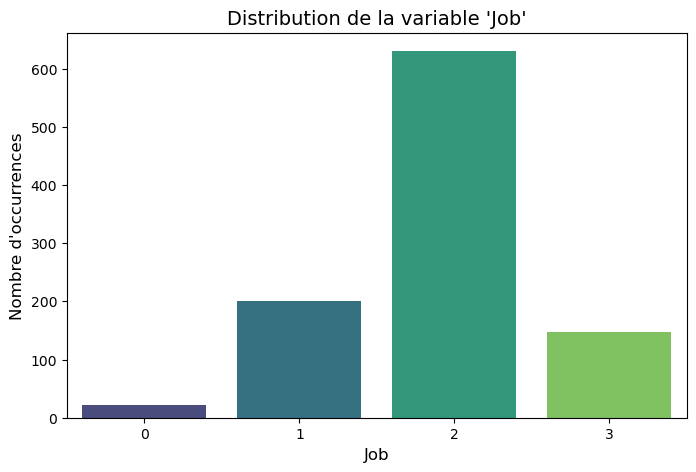

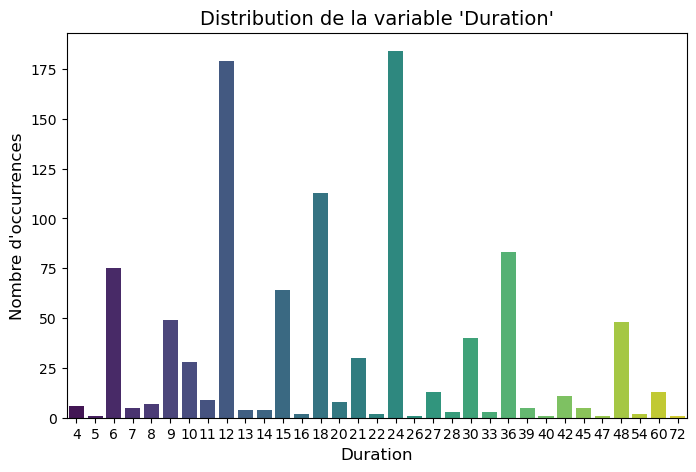

In [12]:
import seaborn as sns
# Liste des variables quantitatives discrètes
quantitative_discrete_vars = ["Job", "Duration"]

# Création des graphiques
for var in quantitative_discrete_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, data=data, palette="viridis")  # Diagramme en barres
    plt.title(f"Distribution de la variable '{var}'", fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Nombre d'occurrences", fontsize=12)
    plt.show()

### Variables quantitatives continues

Nous allons tracer les histogrammes pour verifier leur distribution mais surtotu visualiser les box plots pour voir si le dataset contient d'envantuelles valeurs abberantes

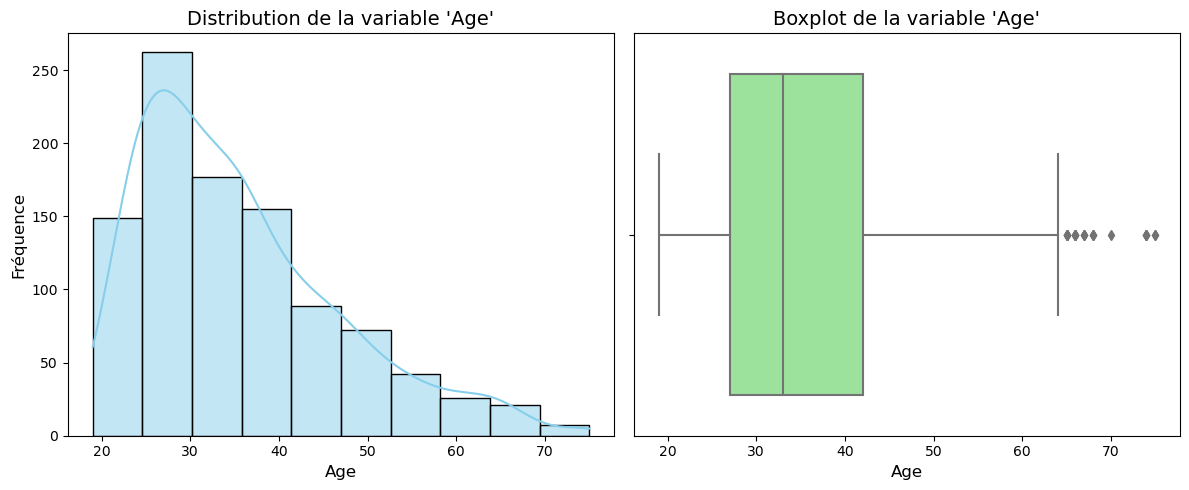

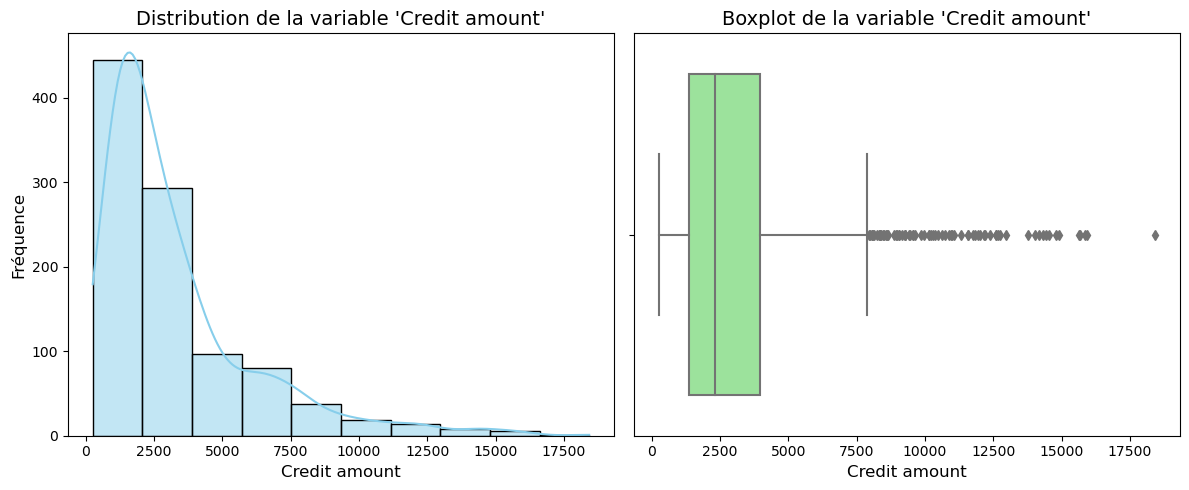

In [13]:
# Liste des variables quantitatives continues
quantitative_continuous_vars = ["Age", "Credit amount"]

# Visualisation des histogrammes et boxplots
for var in quantitative_continuous_vars:
    # Histogramme
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)  # Premier graphique : Histogramme
    sns.histplot(data[var], kde=True, bins=10, color="skyblue")  # Histogramme avec courbe de densité
    plt.title(f"Distribution de la variable '{var}'", fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Fréquence", fontsize=12)
    
    # Boxplot
    plt.subplot(1, 2, 2)  # Deuxième graphique : Boxplot
    sns.boxplot(x=data[var], color="lightgreen")
    plt.title(f"Boxplot de la variable '{var}'", fontsize=14)
    plt.xlabel(var, fontsize=12)
    
    plt.tight_layout()  # Ajustement des graphiques
    plt.show()

La variable credit amount a une tendance à la normale avec une axymétrie vers la gauche , mais présente beaucoup de valeurs aberrantes . Il serait judiicieux de faire une standarisation de cette variable dans la suite

### Les variables qualitatives nominale

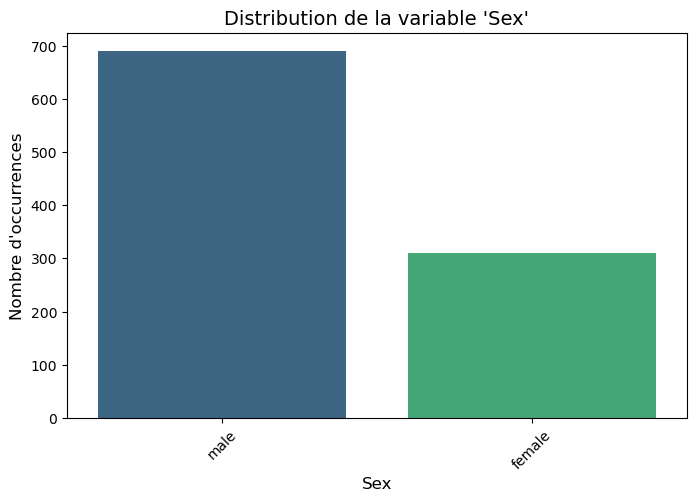

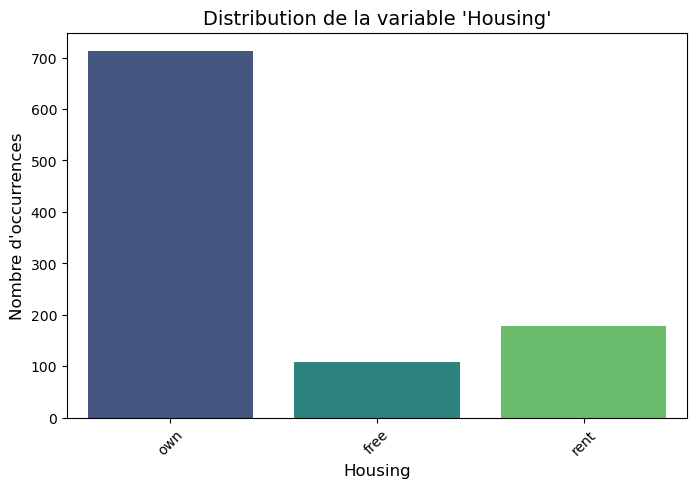

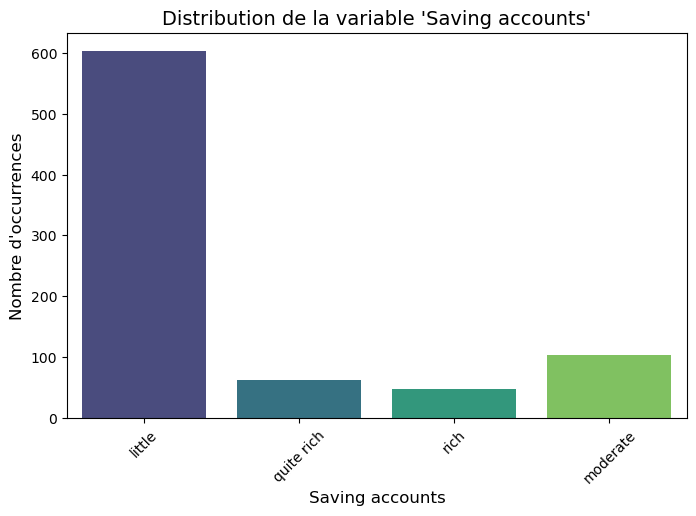

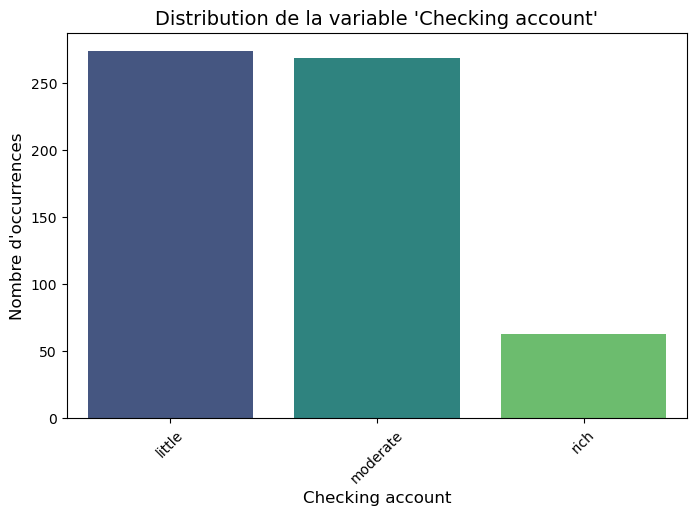

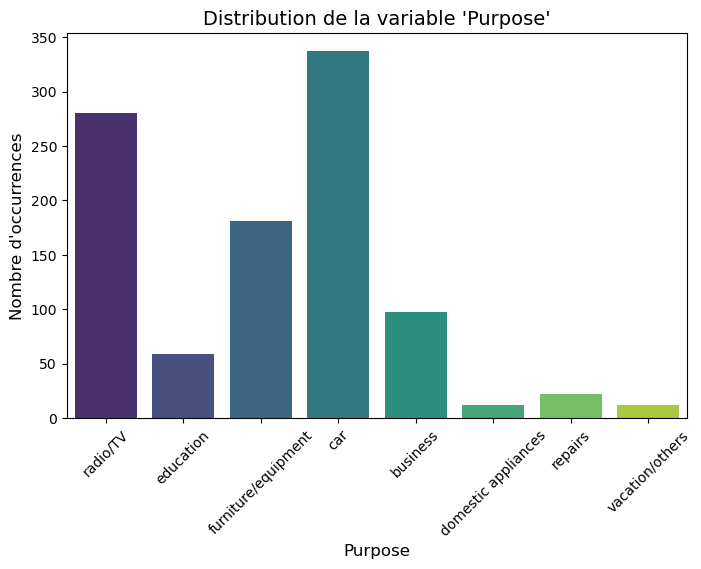

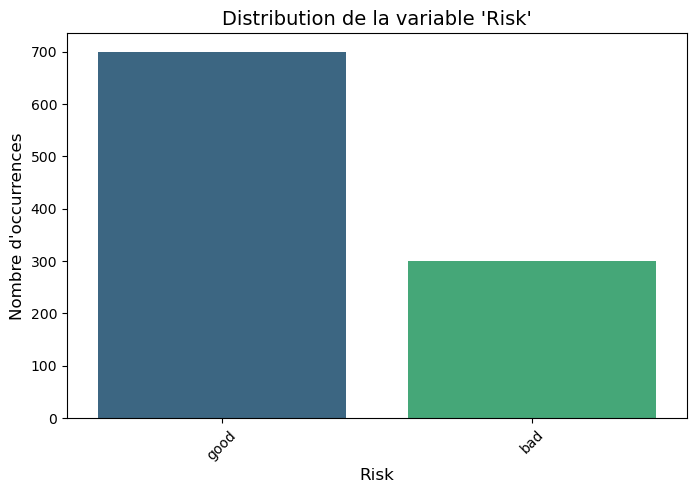

In [14]:

# Identifier les variables qualitatives nominales
qualitative_nominal_vars = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk"]

# Visualisation des variables qualitatives nominales
for var in qualitative_nominal_vars:
    if var in data.columns:  # Vérifier si la colonne existe dans le dataset
        plt.figure(figsize=(8, 5))
        sns.countplot(x=var, data=df, palette="viridis")  # Diagramme en barres
        plt.title(f"Distribution de la variable '{var}'", fontsize=14)
        plt.xlabel(var, fontsize=12)
        plt.ylabel("Nombre d'occurrences", fontsize=12)
        plt.xticks(rotation=45)  # Rotation des labels si nécessaire
        plt.show()

La target , "risk" presente un désequilibre . 30% des données sont de type bad et 70% good . Malgrés que elle represente bien la realité nous allons  soit en untiliser des modèles de classification à inflation de 0 ou ajouter le parametre stratify le de la creation des train et test set

### variable catégorielles ordinales

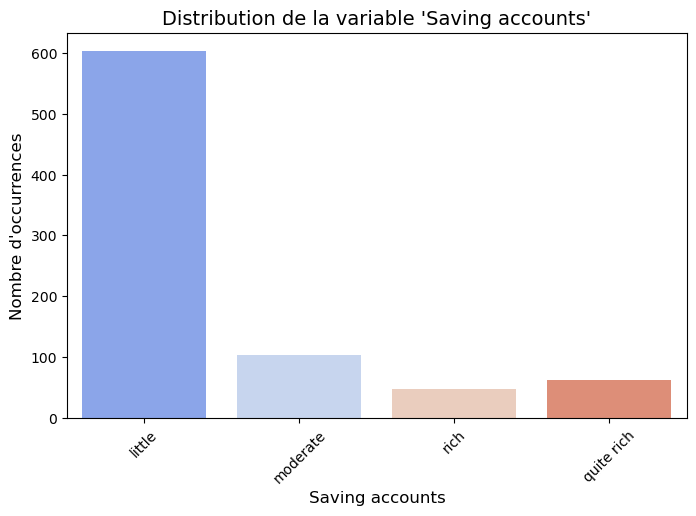

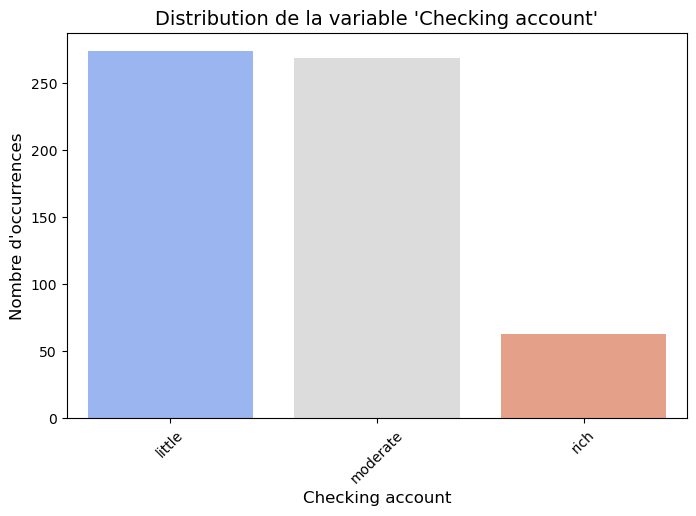

In [15]:

qualitative_ordinal_vars = ["Saving accounts", "Checking account"]

# Définir l'ordre des catégories
ordinal_order = {
    "Saving accounts": ["little", "moderate", "rich", "quite rich"],
    "Checking account": ["little", "moderate", "rich"]
}

# Visualisation des variables qualitatives ordinales
for var in qualitative_ordinal_vars:
    if var in data.columns:  # Vérifier si la colonne existe dans le dataset
        plt.figure(figsize=(8, 5))
        sns.countplot(
            x=var, 
            data=df, 
            palette="coolwarm", 
            order=ordinal_order.get(var, None)  # Respecter l'ordre des catégories
        )
        plt.title(f"Distribution de la variable '{var}'", fontsize=14)
        plt.xlabel(var, fontsize=12)
        plt.ylabel("Nombre d'occurrences", fontsize=12)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"La colonne '{var}' n'existe pas dans le dataset.")


### Analyse bivarié

### Variable Quantitative_target

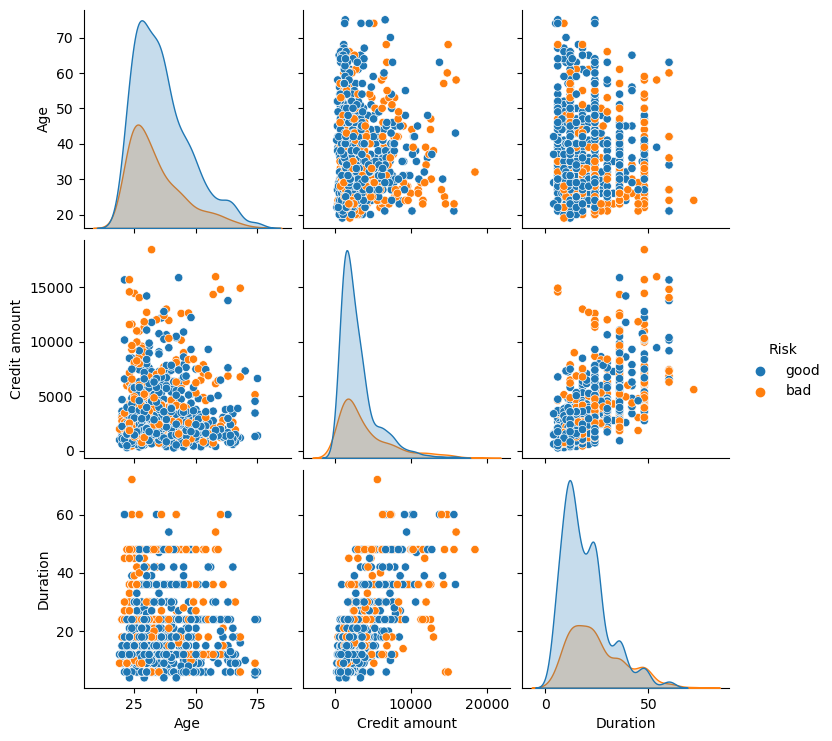

In [16]:
sns.pairplot(data, hue='Risk', vars=['Age', 'Credit amount', 'Duration'])



### Variable qualitative_target

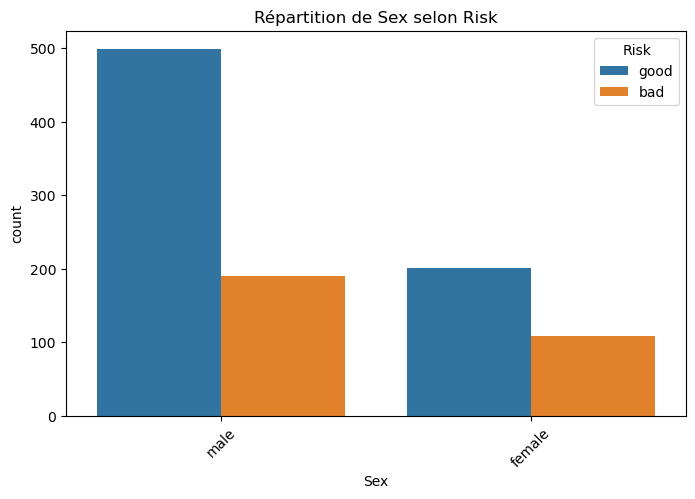

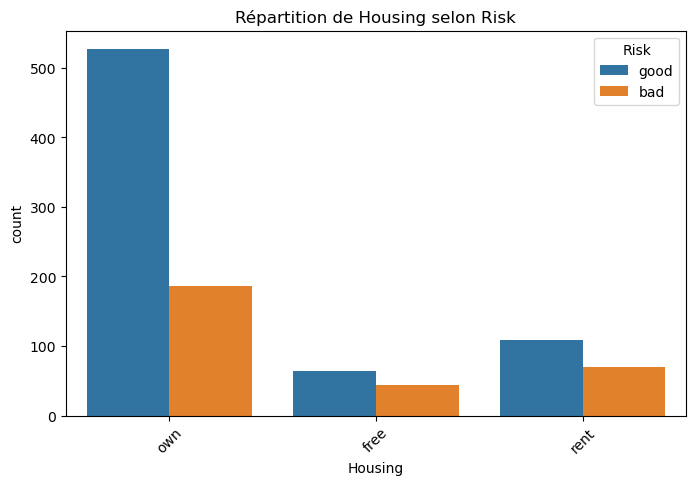

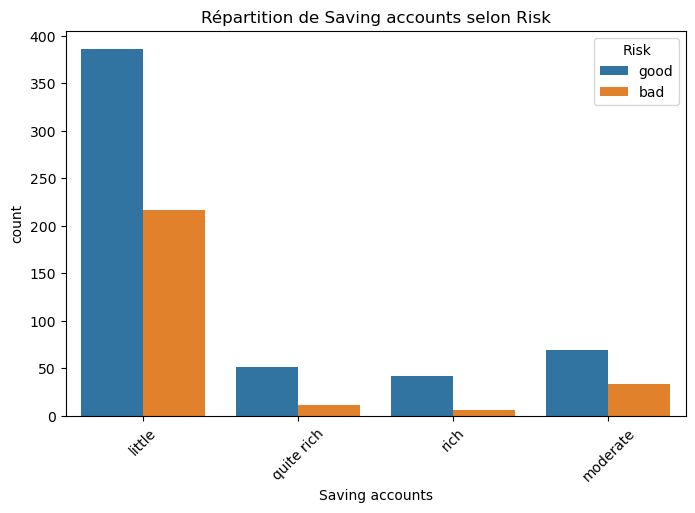

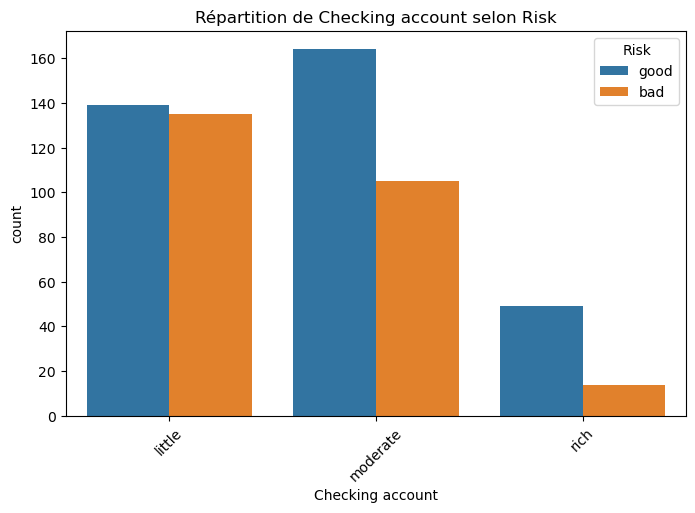

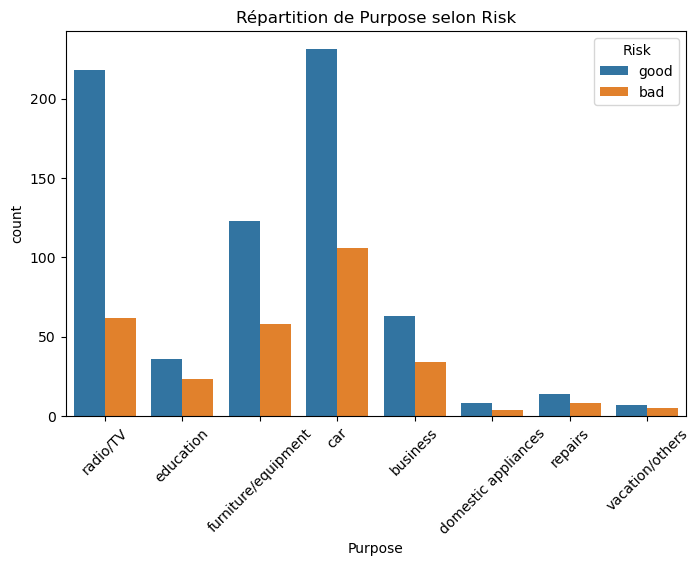

In [17]:
# Liste des variables qualitatives
qualitative_vars = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Tracer des countplots
for var in qualitative_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, hue='Risk', data=data)
    plt.title(f"Répartition de {var} selon Risk")
    plt.xticks(rotation=45)
    plt.show()


### Encodage et heatmap

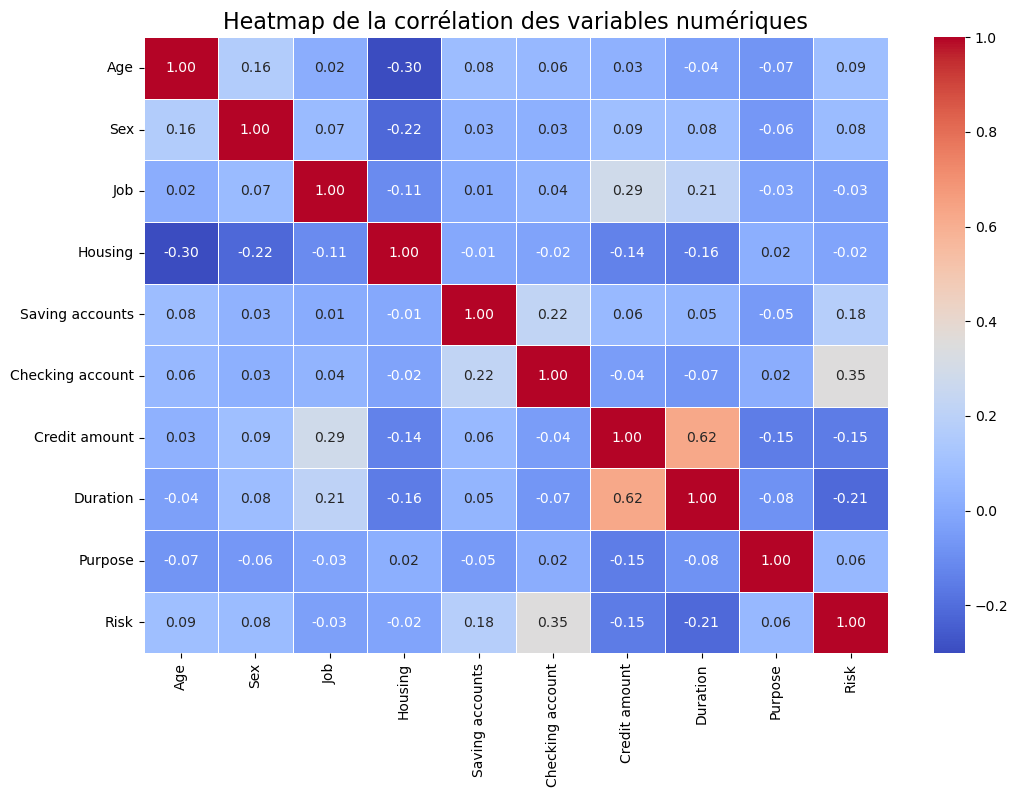

In [18]:

from sklearn.preprocessing import LabelEncoder

# Identifier toutes les variables catégorielles
categorical_columns = data.select_dtypes(include=['object']).columns

# Initialiser LabelEncoder
label_encoder = LabelEncoder()

# Encoder toutes les variables catégorielles
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(df[column])

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Visualiser la corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap de la corrélation des variables numériques", fontsize=16)
plt.show()


Les variables  Purpose , Housing, job , sex et age on une correlation de moins de 10% avec la variable target risk . Pour l'entrainement du modèle nous allons nous passer de ces variables. Les variables significatives seront dont :

##### Duration , credit amount,chacking account , saving account

In [26]:
# Sélectionner les variables significatives pour le modèle
selected_columns = ['Duration', 'Credit amount', 'Checking account', 'Saving accounts', 'Risk']

# Créer le nouveau dataset
df_selected = data[selected_columns]

# Vérification du nouveau dataset
print(df_selected.head())


   Duration  Credit amount  Checking account  Saving accounts  Risk
0         6           1169                 0                4     1
1        48           5951                 1                0     0
2        12           2096                 3                0     1
3        42           7882                 0                0     1
4        24           4870                 0                0     0


In [27]:
# Renommer les colonnes pour ajouter des underscores
df_selected = df_selected.rename(columns={
    'Credit amount': 'Credit_amount',
    'Checking account': 'Checking_account',
    'Saving accounts': 'Saving_accounts'
})

# Vérification du nouveau dataset
print(df_selected.head())


   Duration  Credit_amount  Checking_account  Saving_accounts  Risk
0         6           1169                 0                4     1
1        48           5951                 1                0     0
2        12           2096                 3                0     1
3        42           7882                 0                0     1
4        24           4870                 0                0     0


In [35]:
df_selected['Checking_account'].unique()

array([0, 1, 3, 2])

In [28]:
# Séparer les variables explicatives (X) et la variable cible (y)
X = df_selected.drop('Risk', axis=1)  # Suppression de la colonne 'Risk' dans X
y = df_selected['Risk']  # La variable cible est 'Risk'

# Vérification
print("Variables explicatives (X) :")
print(X.head())

print("\nVariable cible (y) :")
print(y.head())


Variables explicatives (X) :
   Duration  Credit_amount  Checking_account  Saving_accounts
0         6           1169                 0                4
1        48           5951                 1                0
2        12           2096                 3                0
3        42           7882                 0                0
4        24           4870                 0                0

Variable cible (y) :
0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int32


### Standarisation

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Vérifier si X est un DataFrame ou un NumPy array
if isinstance(X, pd.DataFrame):
    columns = X.columns  # Récupérer les noms des colonnes si X est un DataFrame
else:
    columns = [f"Feature_{i}" for i in range(X.shape[1])]  # Générer des noms si X est un NumPy array

# Création de l'instance StandardScaler
scaler = StandardScaler()

# Standardisation et conversion en DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=columns)

# Affichage pour vérifier
print("Variables standardisées (X) :\n", X.head())



Variables standardisées (X) :
    Duration  Credit_amount  Checking_account  Saving_accounts
0 -1.236478      -0.745131         -1.254566         1.833169
1  2.248194       0.949817         -0.459026        -0.699707
2 -0.738668      -0.416562          1.132053        -0.699707
3  1.750384       1.634247         -1.254566        -0.699707
4  0.256953       0.566664         -1.254566        -0.699707


### Creation des train et test set

In [30]:
from sklearn.model_selection import train_test_split

# Séparer les données en train et test avec stratification sur 'Risk' (variable cible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification de la distribution de la cible dans les ensembles
print("Répartition des classes dans l'ensemble d'entraînement (y_train) :")
print(y_train.value_counts(normalize=True))

print("\nRépartition des classes dans l'ensemble de test (y_test) :")
print(y_test.value_counts(normalize=True))


Répartition des classes dans l'ensemble d'entraînement (y_train) :
1    0.7
0    0.3
Name: Risk, dtype: float64

Répartition des classes dans l'ensemble de test (y_test) :
1    0.7
0    0.3
Name: Risk, dtype: float64


### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialiser le modèle KNN
knn = KNeighborsClassifier()

# Définir le param_grid pour la recherche de grille avec un nombre de voisins de 1 à 50 et différentes distances
param_grid = {
    'n_neighbors': list(range(1, 51)),  # Nombre de voisins de 1 à 50
    'weights': ['uniform', 'distance'],  # Uniforme ou distance pondérée
    'metric': ['euclidean', 'manhattan']  # Choix des distances : euclidienne ou manhattan
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score correspondant
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score (validation croisée) : ", grid_search.best_score_)

# 3. Utiliser le meilleur modèle pour prédire sur les données de test
best_knn = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_knn.predict(X_test)

# Évaluation du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy sur l'ensemble de test : ", accuracy)


Meilleurs paramètres :  {'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'uniform'}
Meilleur score (validation croisée) :  0.74
Accuracy sur l'ensemble de test :  0.785


### Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialiser le modèle Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Définir le param_grid pour la recherche de grille avec différentes profondeurs et critères
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],  # Profondeur de l'arbre
    'min_samples_split': [2, 10, 20],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 5, 10],  # Nombre minimum d'échantillons pour être une feuille
    'criterion': ['gini', 'entropy']  # Critère de division
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score correspondant
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score (validation croisée) : ", grid_search.best_score_)

# 3. Utiliser le meilleur modèle pour prédire sur les données de test
best_dt = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_dt.predict(X_test)

# Évaluation du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy sur l'ensemble de test : ", accuracy)



Meilleurs paramètres :  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Meilleur score (validation croisée) :  0.72
Accuracy sur l'ensemble de test :  0.68


### RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialiser le modèle RandomForest (Bagging)
rf = RandomForestClassifier(random_state=42)

# Paramètres à explorer pour la recherche de grille
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 10, 20]  # Nombre minimum d'échantillons pour diviser un nœud
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score (validation croisée) : ", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur les données de test
best_rf = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_rf.predict(X_test)

# Évaluation du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy sur l'ensemble de test : ", accuracy)


Meilleurs paramètres :  {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 200}
Meilleur score (validation croisée) :  0.7550000000000001
Accuracy sur l'ensemble de test :  0.765


## Modeles d'ensemble
### Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialiser le modèle GradientBoosting (Boosting)
gb = GradientBoostingClassifier(random_state=42)

# Paramètres à explorer pour la recherche de grille
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'max_depth': [3, 5, 7]  # Profondeur maximale des arbres
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score (validation croisée) : ", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur les données de test
best_gb = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_gb.predict(X_test)

# Évaluation du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy sur l'ensemble de test : ", accuracy)


Meilleurs paramètres :  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Meilleur score (validation croisée) :  0.7424999999999999
Accuracy sur l'ensemble de test :  0.735


### Modele a inflation de 0

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Appliquer Logistic Regression avec pondération des classes
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

# Prédictions sur le test
y_pred_logreg = logreg.predict(X_test)

# Évaluation du modèle
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy: ", accuracy_logreg)
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy:  0.67
              precision    recall  f1-score   support

           0       0.47      0.78      0.59        60
           1       0.87      0.62      0.72       140

    accuracy                           0.67       200
   macro avg       0.67      0.70      0.66       200
weighted avg       0.75      0.67      0.68       200



### SVM

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Définir la grille de paramètres
param_grid = {
    'C': [0.1, 1, 10, 100],          # Paramètre de régularisation
    'kernel': ['linear', 'rbf', 'poly'],  # Types de noyaux
    'gamma': ['scale', 'auto']       # Paramètre gamma pour RBF et poly
}

# Initialiser SVC
svm = SVC(class_weight='balanced', random_state=42)

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Entraîner le modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", grid_search.best_params_)

# Prédictions sur le test avec le meilleur modèle
y_pred_svm = grid_search.predict(X_test)

# Évaluation du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy avec GridSearchCV: ", accuracy_svm)

# Affichage du classification report
print(classification_report(y_test, y_pred_svm))


Meilleurs paramètres :  {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
SVM Accuracy avec GridSearchCV:  0.71
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        60
           1       0.82      0.76      0.79       140

    accuracy                           0.71       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.71      0.72       200



In [24]:
import joblib

In [32]:
joblib.dump(best_knn,"modele_pred_credit_scoring.pkl")

['modele_pred_credit_scoring.pkl']